In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [88]:
df=pd.read_csv("ad_ctr.csv")

In [46]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [47]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [48]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [89]:
df=df.rename(columns={'Daily Time Spent on Site':'Time_spent','Clicked on Ad':'Clicks'})
df.head(3)

,Time_spent,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicks
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0


In [82]:
#### Checking Null values

In [50]:
df.isna().sum()

Time_spent              0
Age                     0
Area Income             0
Daily Internet Usage    0
Ad Topic Line           0
City                    0
Gender                  0
Country                 0
Timestamp               0
Clicks                  0
dtype: int64

#### UNIVARIATE ANALYSIS

In [101]:
click_counts = df['Clicks'].value_counts()
print("Clicks with value 0:", click_counts[0])
print("Clicks with value 1:", click_counts[1])

Clicks with value 0: 5083
Clicks with value 1: 4917


<Axes: xlabel='Clicks', ylabel='count'>

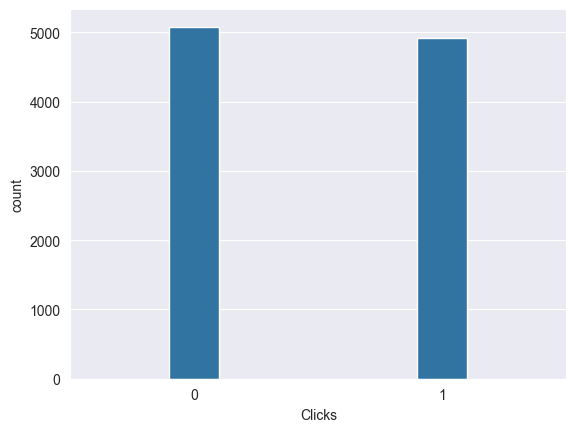

In [102]:
sns.barplot(click_counts,width=0.2)

In [108]:
gendrtime=df['Time_spent'].groupby(df['Gender']).sum()
gendrtime

Gender
Female    328698.93
Male      287908.64
Name: Time_spent, dtype: float64

<Axes: xlabel='Gender', ylabel='Time_spent'>

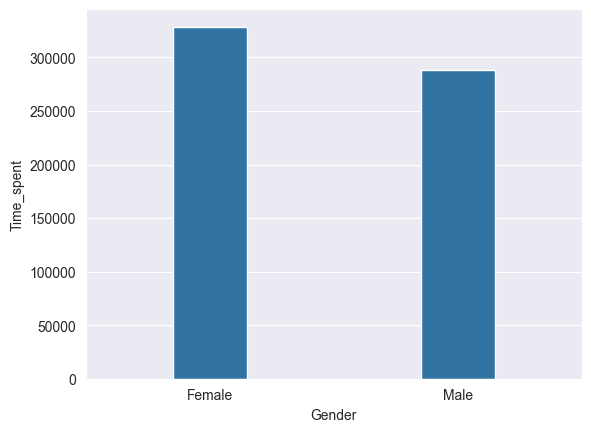

In [97]:
sns.barplot(gendrtime,width=0.3)

In [109]:
#### Age Distribution

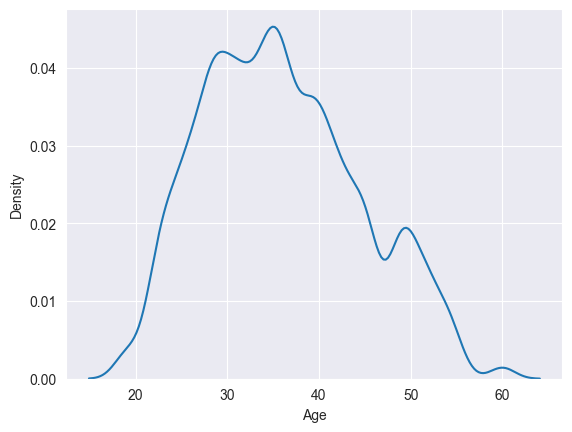

In [53]:
sns.kdeplot(df['Age'])
sns.set_style("darkgrid")

In [110]:
#### Daily Net Usage

Text(0.5, 0, 'NET USAGE')

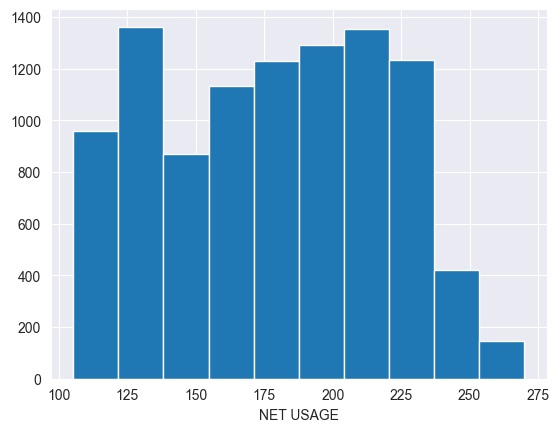

In [115]:
plt.hist(df['Daily Internet Usage'])
plt.xlabel("NET USAGE")

In [113]:
df['Time_spent'].mode()

0    55.6
Name: Time_spent, dtype: float64

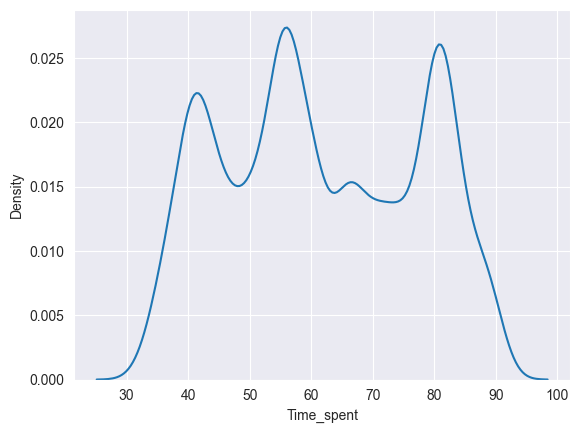

In [55]:
sns.kdeplot(df['Time_spent'])
sns.set_style("darkgrid")

#### BIVARIATE ANALYSIS

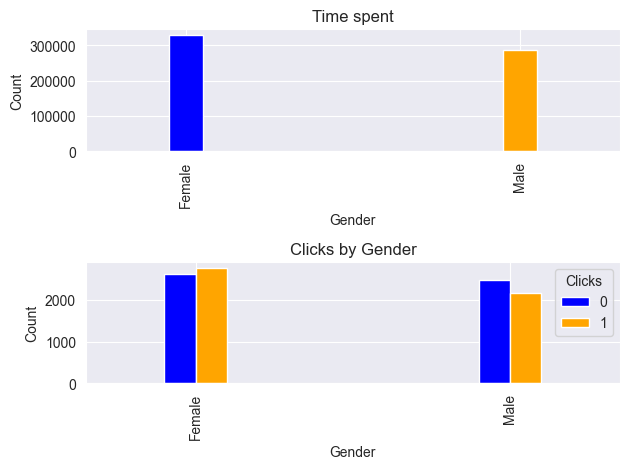

In [56]:
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
gendrtime.plot(kind='bar',ax=ax1,color=['blue','orange'],width=0.1)
ax1.set_title('Time spent')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Count')
clk.plot(kind='bar', ax=ax2, color=['blue', 'orange'],width=0.2)
ax2.set_title('Clicks by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [98]:
clk=df['Clicks'].groupby(df['Gender']).value_counts().unstack()
clk

Clicks,0,1
Gender,,
Female,2609,2767
Male,2474,2150


<Axes: xlabel='Time_spent', ylabel='Density'>

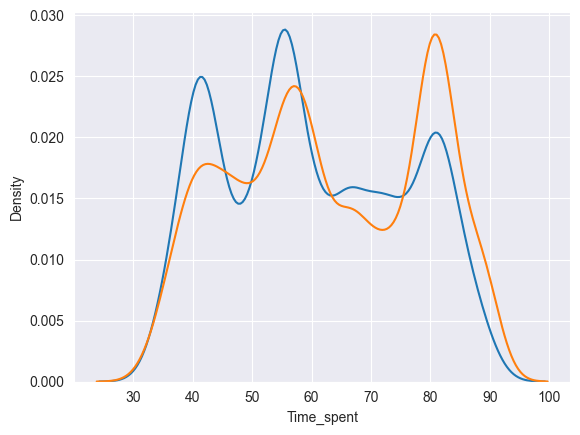

In [57]:
ck1=df[df['Clicks']==0]
ck2=df[df['Clicks']==1]
sns.kdeplot(ck1['Time_spent'], label='clicks 0')
sns.kdeplot(ck2['Time_spent'], label='clicks 1')

Text(0.5, 1.0, 'Number of Clicks based on Age')

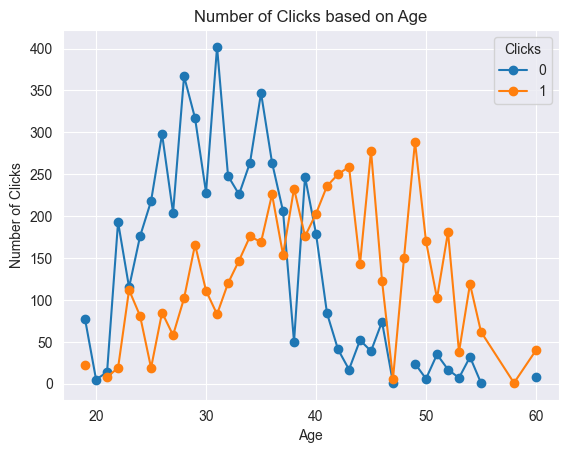

In [74]:
clicks_by_age = df.groupby('Age')['Clicks'].value_counts().unstack()
clicks_by_age.plot(kind='line', marker='o')


plt.xlabel('Age')
plt.ylabel('Number of Clicks')
plt.title('Number of Clicks based on Age')

#### PREDICTION MODEL

In [79]:
###CTR stands for Click-Through Rate. 
###It's a metric commonly used in online advertising to measure the effectiveness of an advertisement or a link in getting users to click on it.

In [60]:
##CALCULATING CTR(Click Through Rate)
clkcount=df['Clicks'].value_counts().sum()
success=df['Clicks'].value_counts()
CTR=(success/clkcount)*100
CTR

Clicks
0    50.83
1    49.17
Name: count, dtype: float64

In [61]:
df.head(2)

,Time_spent,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicks
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0


In [80]:
#### Using Labelencoder label encoding the Gender.
#### Gender being a categorical data

In [63]:
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])

In [76]:
x=df.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=df.iloc[:,9]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y, test_size=0.2,random_state=4)

In [77]:
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [146]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", model.predict(features))

Ads Click Through Rate Prediction : 


Daily Time Spent on Site:  38
Age:  42
Area Income:  65000
Daily Internet Usage:  1700
Gender (Male = 1, Female = 0) :  0


Will the user click on ad =  [1]


C:\Users\SK SHARMA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
